In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading full dataframe
final_df = pd.read_csv('final_df.csv')

In [3]:
final_df

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Crazy - Single Version,"Patsy Cline, The Jordanaires",3zpj9dvJABiyMrmLCPw6i8,0.471,0.021,10,-24.385,1,0.0366,0.931000,0.000001,0.1030,0.3560,107.796
1,Folsom Prison Blues,"Johnny Cash, The Tennessee Two",121sjkub4p4zcFNozkKnQD,0.754,0.540,5,-8.326,1,0.0266,0.687000,0.000075,0.0868,0.7900,101.738
2,I Will Always Love You,Dolly Parton,6nRvgo4ySezQKD1D7NIqAu,0.446,0.142,9,-13.498,1,0.0335,0.960000,0.001140,0.1010,0.1560,135.724
3,Springsteen,Eric Church,05ZACkzW8YbRq3eFgIfSNB,0.692,0.809,2,-5.935,1,0.0255,0.100000,0.000098,0.1850,0.9270,104.023
4,He Stopped Loving Her Today,George Jones,6qMgx8ys4MNNxypaIvbG0i,0.430,0.173,8,-18.597,1,0.0321,0.594000,0.000111,0.2240,0.3650,72.103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8964,Afterhour,Carlo Ruetz,2Sh9tvtvR7rmnBpeQ7KbPu,0.776,0.972,1,-6.503,1,0.0421,0.001580,0.917000,0.1110,0.1970,128.017
8965,Latex,Monika Kruse,7Lp0NobaOnTfqcHPjVXzA6,0.797,0.846,1,-7.033,0,0.0839,0.000125,0.952000,0.1190,0.0325,129.005
8966,Whisper,Anna Reusch,0j8iHPirDSkD5nUQw9XzRF,0.791,0.938,10,-7.155,0,0.0518,0.000238,0.917000,0.1110,0.0665,132.004
8967,Mother Earth - Original Mix,Fatima Hajji,4U29PAbl99xuzW3JWSX0u0,0.575,0.998,10,-5.957,0,0.0792,0.000063,0.685000,0.2700,0.6710,134.993


In [4]:
# dataframe for only audio features
X = final_df.drop(columns=['title','artist','id'])

### Scaling data

In [5]:
# scaling the audio features dataframe
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.471,0.021,10,-24.385,1,0.0366,0.931,0.000001,0.1030,0.356,107.796
1,0.754,0.540,5,-8.326,1,0.0266,0.687,0.000075,0.0868,0.790,101.738
2,0.446,0.142,9,-13.498,1,0.0335,0.960,0.001140,0.1010,0.156,135.724
3,0.692,0.809,2,-5.935,1,0.0255,0.100,0.000098,0.1850,0.927,104.023
4,0.430,0.173,8,-18.597,1,0.0321,0.594,0.000111,0.2240,0.365,72.103


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.201972,-3.542468,1.224225,-4.303472,0.841074,-1.006324,3.270805,-0.364895,-0.641143,-1.014089,-0.189225
1,0.647565,-0.857739,-0.143940,-0.200113,0.841074,-1.078460,2.223057,-0.364572,-0.740163,1.000181,-0.392732
2,-1.365359,-2.916548,0.950592,-1.521650,0.841074,-1.028686,3.395332,-0.359915,-0.653368,-1.942324,0.748960
3,0.242366,0.533768,-0.964840,0.410830,0.841074,-1.086395,-0.297550,-0.364473,-0.139934,1.636023,-0.315972
4,-1.469926,-2.756189,0.676959,-2.824535,0.841074,-1.038785,1.823710,-0.364415,0.098447,-0.972318,-1.388260


### Clustering data

In [6]:
# setting up clusters
kmeans = KMeans(n_clusters=22, random_state=345)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=22, random_state=345)

In [7]:
kmeans.inertia_

38549.06230129042

In [8]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0     477
1     515
2     645
3     345
4     417
5     372
6     382
7     530
8     283
9     111
10    349
11    536
12    432
13    356
14    525
15    429
16     88
17    509
18    485
19    332
20    541
21    310
dtype: int64

In [9]:
X['cluster'] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.471,0.021,10,-24.385,1,0.0366,0.931,0.000001,0.1030,0.356,107.796,3
1,0.754,0.540,5,-8.326,1,0.0266,0.687,0.000075,0.0868,0.790,101.738,10
2,0.446,0.142,9,-13.498,1,0.0335,0.960,0.001140,0.1010,0.156,135.724,3
3,0.692,0.809,2,-5.935,1,0.0255,0.100,0.000098,0.1850,0.927,104.023,15
4,0.430,0.173,8,-18.597,1,0.0321,0.594,0.000111,0.2240,0.365,72.103,3


In [10]:
# adding cluster to dataframe
final_df['cluster'] = clusters
final_df.head()

,title,artist,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Crazy - Single Version,"Patsy Cline, The Jordanaires",3zpj9dvJABiyMrmLCPw6i8,0.471,0.021,10,-24.385,1,0.0366,0.931,0.000001,0.1030,0.356,107.796,3
1,Folsom Prison Blues,"Johnny Cash, The Tennessee Two",121sjkub4p4zcFNozkKnQD,0.754,0.540,5,-8.326,1,0.0266,0.687,0.000075,0.0868,0.790,101.738,10
2,I Will Always Love You,Dolly Parton,6nRvgo4ySezQKD1D7NIqAu,0.446,0.142,9,-13.498,1,0.0335,0.960,0.001140,0.1010,0.156,135.724,3
3,Springsteen,Eric Church,05ZACkzW8YbRq3eFgIfSNB,0.692,0.809,2,-5.935,1,0.0255,0.100,0.000098,0.1850,0.927,104.023,15
4,He Stopped Loving Her Today,George Jones,6qMgx8ys4MNNxypaIvbG0i,0.430,0.173,8,-18.597,1,0.0321,0.594,0.000111,0.2240,0.365,72.103,3


In [11]:
# saving the updated dataframe to a csv
from pathlib import Path  
filepath = Path('all_info_df.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
final_df.to_csv(filepath, index=False)

### Elbow

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

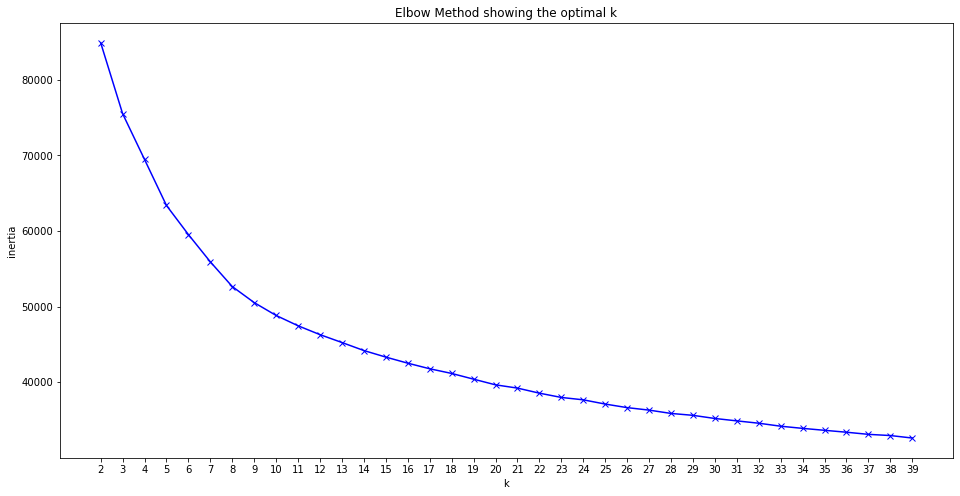

In [12]:
K = range(2, 40)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=345)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

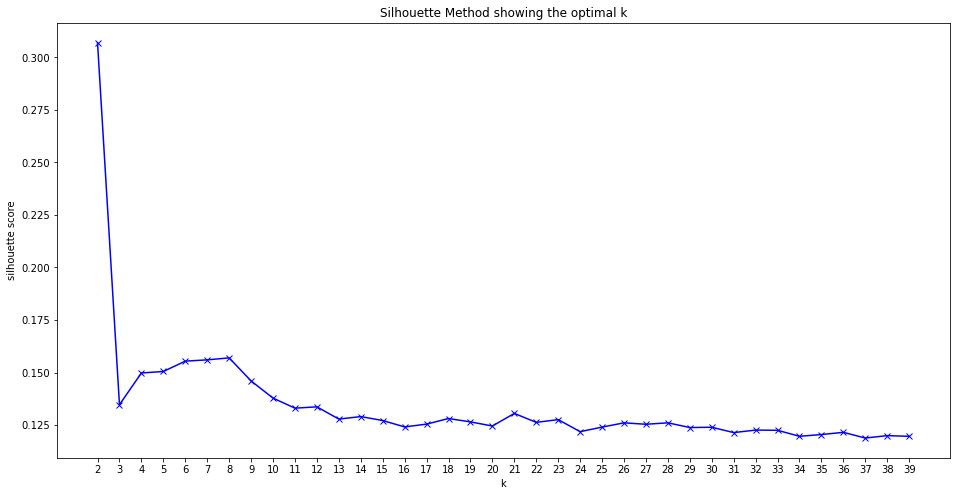

In [13]:
K = range(2, 40)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=345)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Saving with Pickle

In [14]:
import pickle
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)
with open("Model/kmeans_22.pickle", "wb") as f:
    pickle.dump(kmeans,f)